# K-means Clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Classify Similar customers based on Income and Spending

In [6]:
X = df[['Income', 'Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Plot Income and Spend

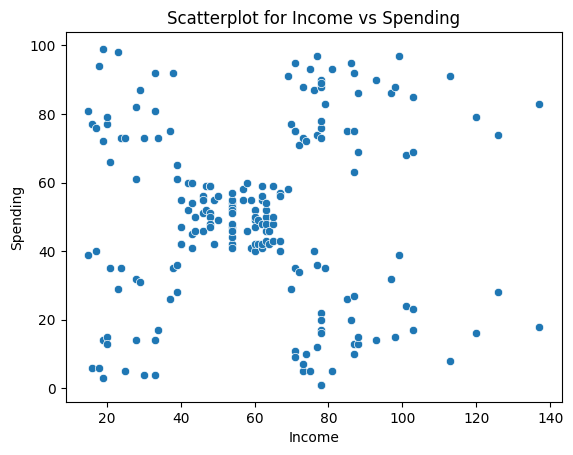

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Income', y='Spending')
plt.title(f'Scatterplot for Income vs Spending')
plt.show()

### Create a Preprocessing pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [11]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [12]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Use Elbow method to find best K value

In [13]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

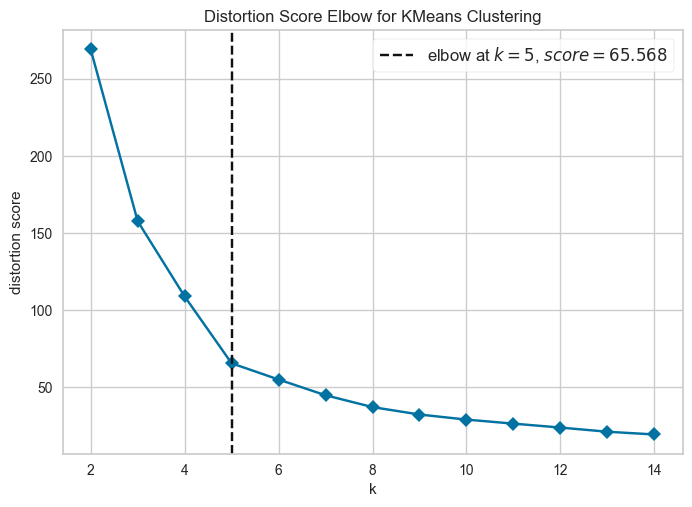

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [15]:
kelbow_visualizer(KMeans(), 
                  X_pre,
                  k=(2, 15),
                  timings=False)

### K-means algorithm
k=5

In [16]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [17]:
lb = model.labels_
lb

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [19]:
X['Label']=lb
X

,Income,Spending,Label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


### Centroids

In [20]:
C = X.groupby(by='Label').mean()
C

,Income,Spending
Label,,
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


### plot clusters

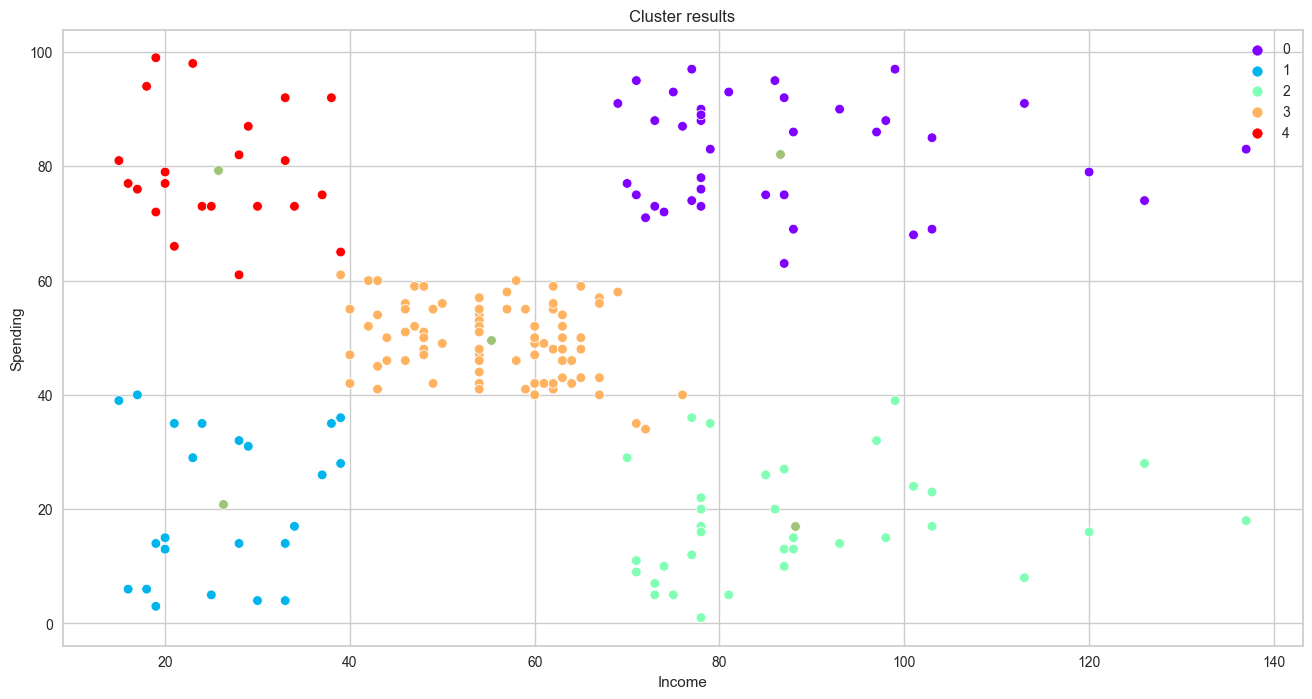

In [21]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Label',palette='rainbow')
sns.scatterplot(data=C, x='Income', y='Spending')
plt.title('Cluster results')
plt.show()

In [22]:
for i in range(5):
    print(f'Cluster number : {i} \n')
    display(X[X['Label']==i])
    print('\n================================================\n')

Cluster number : 0 



,Income,Spending,Label
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0




Cluster number : 1 



,Income,Spending,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1




Cluster number : 2 



,Income,Spending,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2




Cluster number : 3 



,Income,Spending,Label
43,39,61,3
46,40,55,3
47,40,47,3
48,40,42,3
49,40,42,3
...,...,...,...
121,67,40,3
122,69,58,3
126,71,35,3
132,72,34,3




Cluster number : 4 



,Income,Spending,Label
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4
